In [2]:
import numpy as np
import mayavi.mlab as mlab
from vathos_utils.vision import vis_extrinsics
import matplotlib.pyplot as plt

# inspect their pointcloud
VIS = True
file_path = "inference/2638_view_0.p"
#file_path = "/home/sbreuers/vathos/s4g-release/tdgpd/datasets/bearring/train/scene_000.p"
single_training_data = np.load(file_path, allow_pickle=True)
print(single_training_data.keys())
print("point cloud")
print(single_training_data["point_cloud"].shape)
print(single_training_data["point_cloud"][:, 0:5])
print("search score")
print(single_training_data["search_score"].shape)
print(single_training_data["search_score"][0:5])
print("antipodal_score")
print(single_training_data["antipodal_score"].shape)
print(single_training_data["antipodal_score"][0:5])
print("valid_frame")
print(single_training_data["valid_frame"].shape)
print(single_training_data["valid_frame"][0, :, :])
print("valid_index")
print(single_training_data["valid_index"].shape)
print(single_training_data["valid_index"][0:5])
print("objects_label")
print(single_training_data["objects_label"].shape)
print(single_training_data["objects_label"][0:5])

if VIS:
    # visualize point cloud using mayavi
    mlab.figure(bgcolor=(0, 0, 0.1))
    mlab.points3d(
        single_training_data["point_cloud"][0, :],
        single_training_data["point_cloud"][1, :],
        single_training_data["point_cloud"][2, :],
        scale_factor=1,
        color=(1, 1, 1),
        mode="point",
    )

    #mlab.points3d(
    #    single_training_data["point_cloud"][0, single_training_data["objects_label"]],
    #    single_training_data["point_cloud"][1, single_training_data["objects_label"]],
    #    single_training_data["point_cloud"][2, single_training_data["objects_label"]],
    #    scale_factor=0.02,
    #    color=(1, 0, 0),
    #    mode="sphere",
    #)

    # create a color map using objects_label
    #cmap = plt.get_cmap("tab20")
    #colors = cmap(single_training_data["objects_label"] % 20)

    if True:
      mlab.points3d(
          single_training_data["point_cloud"][0, single_training_data["valid_index"]],
          single_training_data["point_cloud"][1, single_training_data["valid_index"]],
          single_training_data["point_cloud"][2, single_training_data["valid_index"]],
          single_training_data["objects_label"]+10,
          scale_factor=0.0005,
          colormap='Set1',
          mode="sphere",
      )
    if False:
      for frame in single_training_data["valid_frame"][:20,:,:]:
        #print(frame)
        vis_extrinsics(frame, scale=0.02)

    # line from each valid index to its corresponding frame
    mlab.quiver3d(
        single_training_data["point_cloud"][0, single_training_data["valid_index"]],
        single_training_data["point_cloud"][1, single_training_data["valid_index"]],
        single_training_data["point_cloud"][2, single_training_data["valid_index"]],
        single_training_data["valid_frame"][:, 0, 3] - single_training_data["point_cloud"][0, single_training_data["valid_index"]],
        single_training_data["valid_frame"][:, 1, 3] - single_training_data["point_cloud"][1, single_training_data["valid_index"]],
        single_training_data["valid_frame"][:, 2, 3] - single_training_data["point_cloud"][2, single_training_data["valid_index"]],
        scale_factor=1.0,
        color=(1, 1, 1),
        mode="arrow"
    )

    mlab.show()


dict_keys(['search_score', 'antipodal_score', 'valid_frame', 'valid_index', 'point_cloud', 'objects_label'])
point cloud
(3, 48902)
[[ 0.23269033  0.22019997  0.22615957  0.19583142  0.1853585 ]
 [ 0.34287396  0.3386026   0.33791447  0.34177426  0.34445158]
 [-1.014849   -1.0107541  -1.0115755  -1.0424486  -1.0506148 ]]
search score
(306,)
[456.6667  387.66666 316.      294.      462.     ]
antipodal_score
(306,)
[0.97540945 0.97183985 0.98422176 0.97475517 0.9976949 ]
valid_frame
(306, 4, 4)
[[-0.21604782 -0.19880381  0.95592916 -0.24223596]
 [-0.8274021   0.55708593 -0.07114293  0.2534126 ]
 [-0.5183912  -0.80630785 -0.28484792 -1.2580454 ]
 [ 0.          0.          0.          1.        ]]
valid_index
(306,)
[2389 2928 3564 3687 3688]
objects_label
(306,)
[105 105  70  70  70]


In [2]:
single_training_data["valid_frame"][:10,:,:].shape

(10, 4, 4)

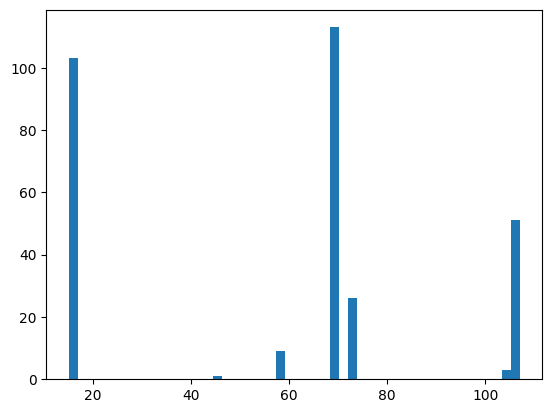

107
15


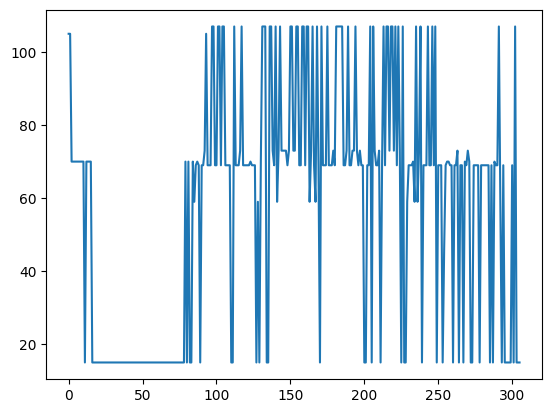

In [3]:
plt.hist(single_training_data["objects_label"], 50)
plt.show()
print(np.max(single_training_data["objects_label"]))
print(np.min(single_training_data["objects_label"]))

plt.plot(single_training_data["objects_label"])
plt.show()